In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('heart_dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [4]:
# Distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 50 distinct values
sex: 2 distinct values
cp: 4 distinct values
trestbps: 68 distinct values
chol: 217 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalach: 119 distinct values
exang: 2 distinct values
oldpeak: 115 distinct values
slope: 3 distinct values
ca: 4 distinct values
thal: 6 distinct values
target: 2 distinct values


In [5]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 14)


In [6]:
df = df.drop_duplicates()

In [19]:
# Check missing ratio
data_na = (df.isnull().sum() / len(df)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(20)

,Missing Ratio
thal,7.880795


In [8]:
# Replace the value 0 with 2 in the 'thall' column
df['thal'] = df['thal'].replace(0, 2)

In [9]:
# Mapping for 'cp' column
cp_mapping = {0: 'typical angina',
              1: 'atypical angina',
              2: 'non-anginal pain',
              3: 'asymptomatic'}
df['cp'] = df['cp'].map(cp_mapping)

# Mapping for 'slp' column
slp_mapping = {0: 'unsloping',
               1: 'flat',
               2: 'downsloping'}
df['slope'] = df['slope'].map(slp_mapping)

# Mapping for 'thall' column
thall_mapping = {1: 'fixed defect',
                 2: 'normal',
                 3: 'reversible defect'}
df['thal'] = df['thal'].map(thall_mapping)

# Mapping for 'rest_ecg' column
rest_ecg_mapping = {0: 'normal',
                    1: 'ST-T wave abnormality',
                    2: 'left ventricular hypertrophy'}
df['restecg'] = df['restecg'].map(rest_ecg_mapping)

# Mapping for 'sex' column
sex_mapping = {1: 'male',
               0: 'female'}
df['sex'] = df['sex'].map(sex_mapping)

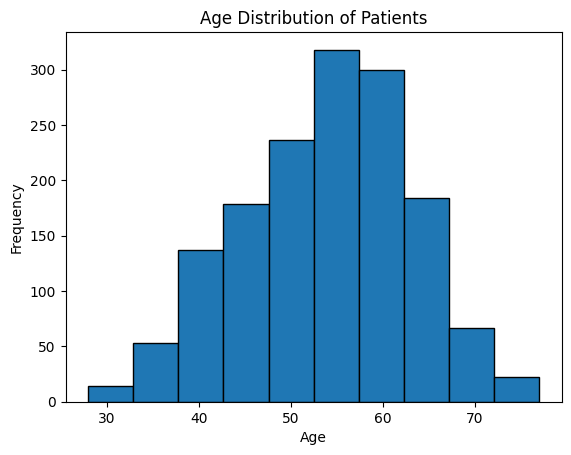

In [10]:
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

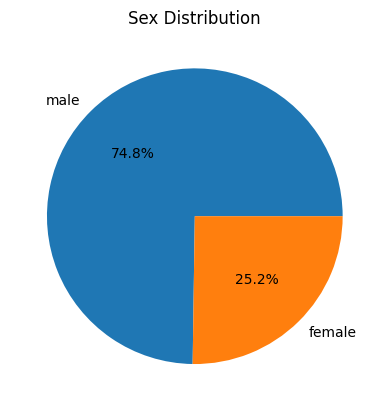

In [11]:
sex_count = df['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

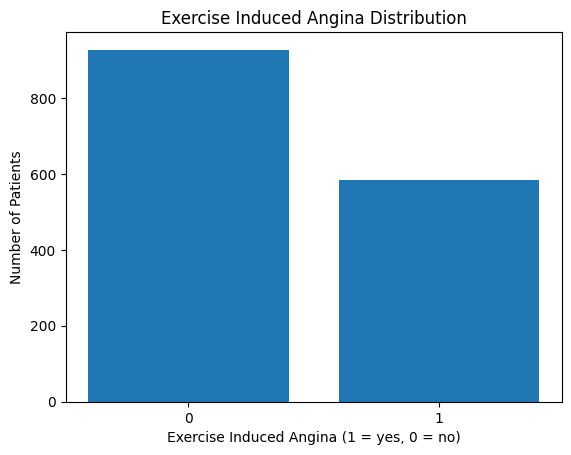

In [12]:
exang_count = df['exang'].value_counts()
plt.bar(exang_count.index, exang_count.values)
plt.title('Exercise Induced Angina Distribution')
plt.xlabel('Exercise Induced Angina (1 = yes, 0 = no)')
plt.ylabel('Number of Patients')
plt.xticks(exang_count.index)
plt.show()

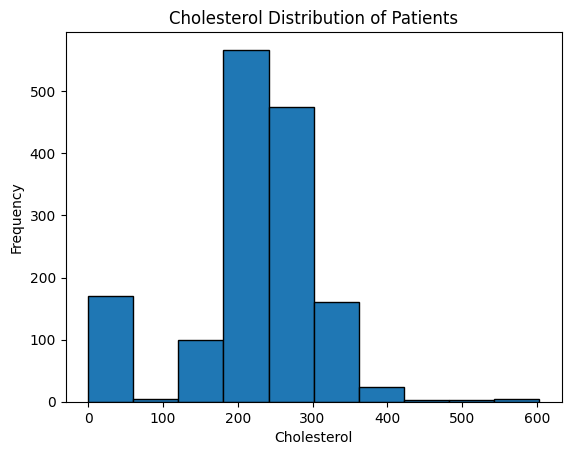

In [13]:
plt.hist(df['chol'], bins=10, edgecolor='black')
plt.title('Cholesterol Distribution of Patients')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

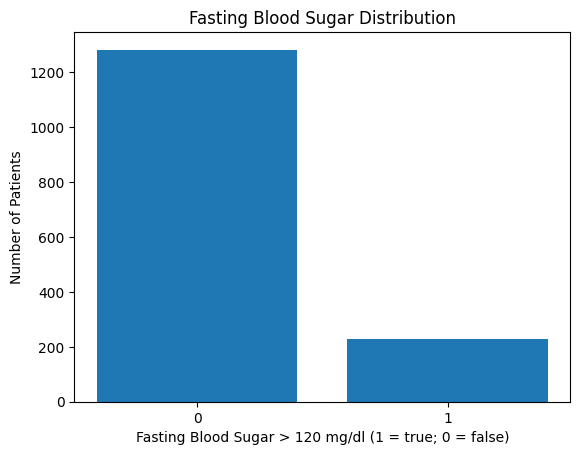

In [14]:
fbs_count = df['fbs'].value_counts()
plt.bar(fbs_count.index, fbs_count.values)
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(fbs_count.index)
plt.show()

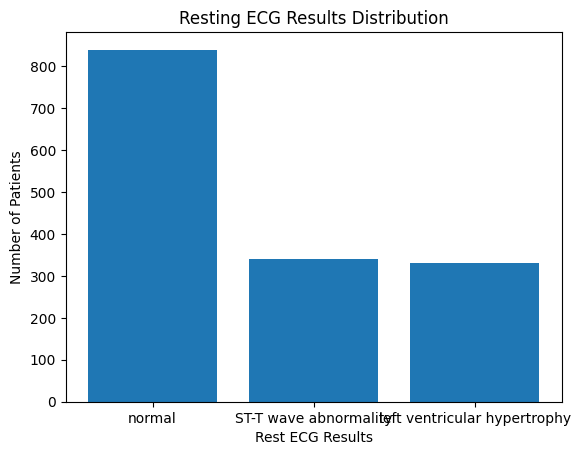

In [15]:
rest_ecg_count = df['restecg'].value_counts()
plt.bar(rest_ecg_count.index, rest_ecg_count.values)
plt.title('Resting ECG Results Distribution')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(rest_ecg_count.index)
plt.show()

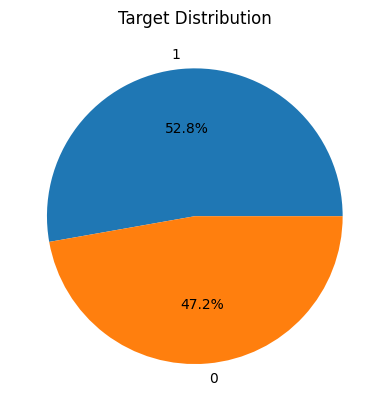

In [16]:
target_count = df['target'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

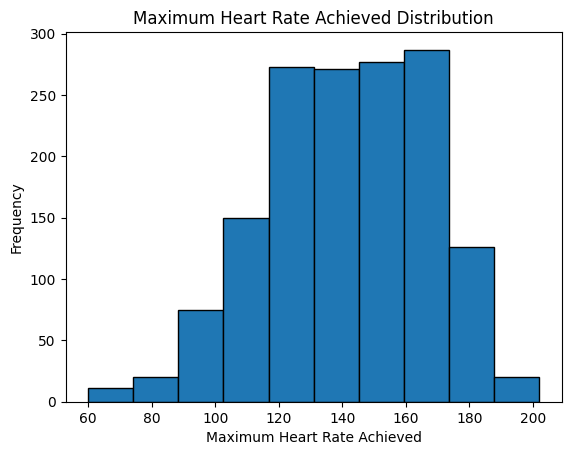

In [17]:
plt.hist(df['thalach'], bins=10, edgecolor='black')
plt.title('Maximum Heart Rate Achieved Distribution')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()

In [18]:
data = df.copy()